In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import filt_freq, RMS

In [98]:
fs, data_2209_pgd = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_22.09.2025/main/MIC1.WAV')
fs, data_2209_micr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_22.09.2025/main/MIC2.WAV')
fs, data_2209_micr_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_22.09.2025/calibr/MIC2.WAV')

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_4980/776939061.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_pgd = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_22.09.2025/main/MIC1.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_4980/776939061.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_micr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_22.09.2025/main/MIC2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_4980/776939061.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_micr_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_22.09.2025/calibr/MIC2.WAV')


In [99]:
data_2209_micr

array([ 0, -1, -3, ..., -9, -6, -2], dtype=int16)

In [100]:
octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


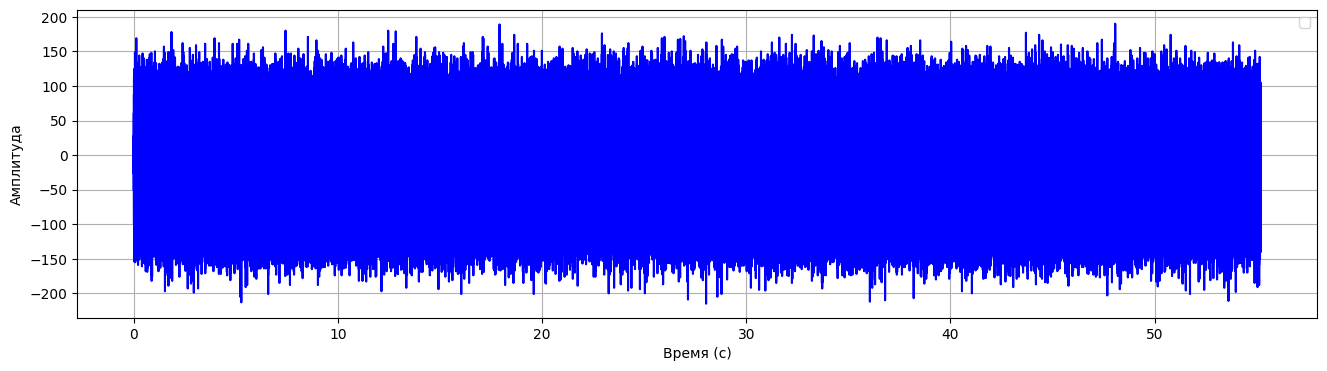

In [101]:
t_pgd = np.arange(len(data_2209_pgd))/fs
f_pgd = fftfreq(len(data_2209_pgd), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_pgd, data_2209_pgd, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


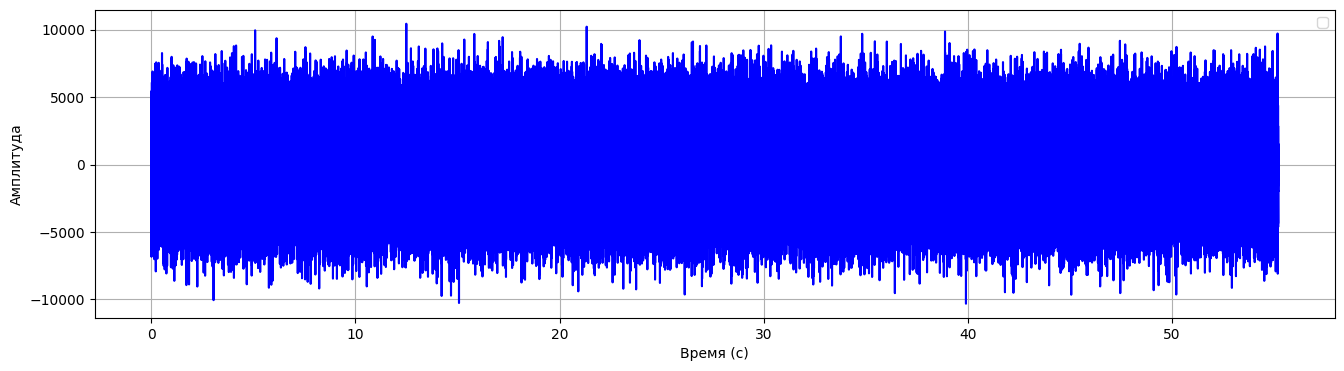

In [102]:
t_micr = np.arange(len(data_2209_micr))/fs
f_micr = fftfreq(len(data_2209_micr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr, data_2209_micr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


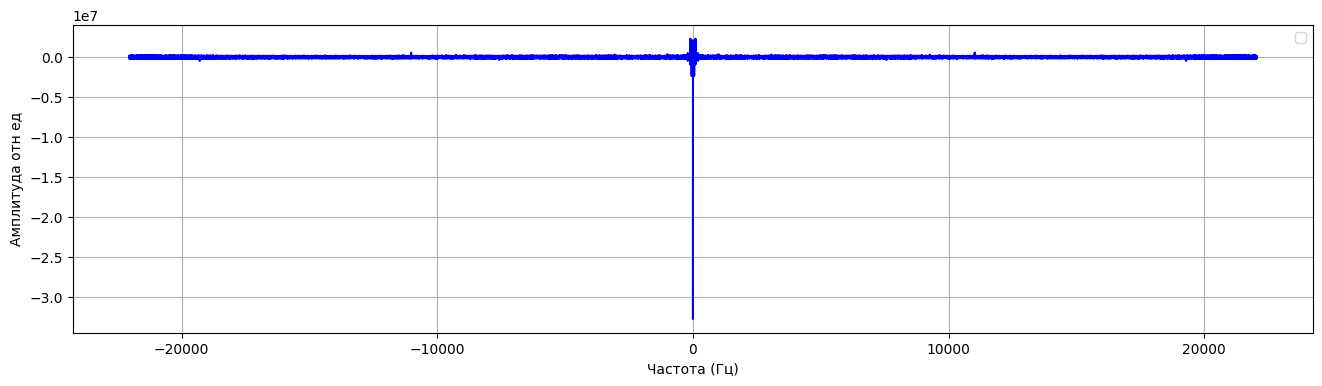

In [103]:
plt.figure(figsize=(16,4))
plt.plot(f_pgd, fft(data_2209_pgd), color='blue')
plt.legend()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда отн ед")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


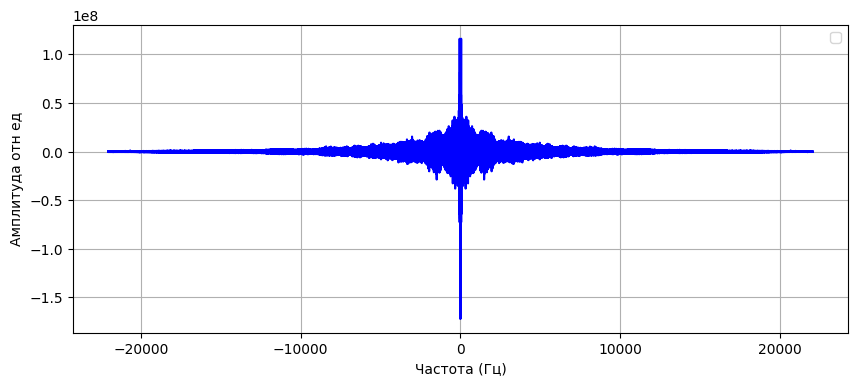

In [104]:
plt.figure(figsize=(10,4))
plt.plot(f_micr, fft(data_2209_micr), color='blue')
plt.legend()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда отн ед")
plt.grid(True)
plt.show()

In [106]:
l_39

array([151.76517717,  81.58256928, 134.96326158, 150.74145377,
       142.24465284, 147.02091812, 157.47468362, 168.55966191,
       147.82463954, 127.75689215, 125.54510569, 103.167373  ,
       110.43669976, 114.05334707,  92.42144661,  64.01950851,
        61.78615138,  48.55962526,  38.44969841,  28.90243214,
        22.86332762,  15.41438043])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


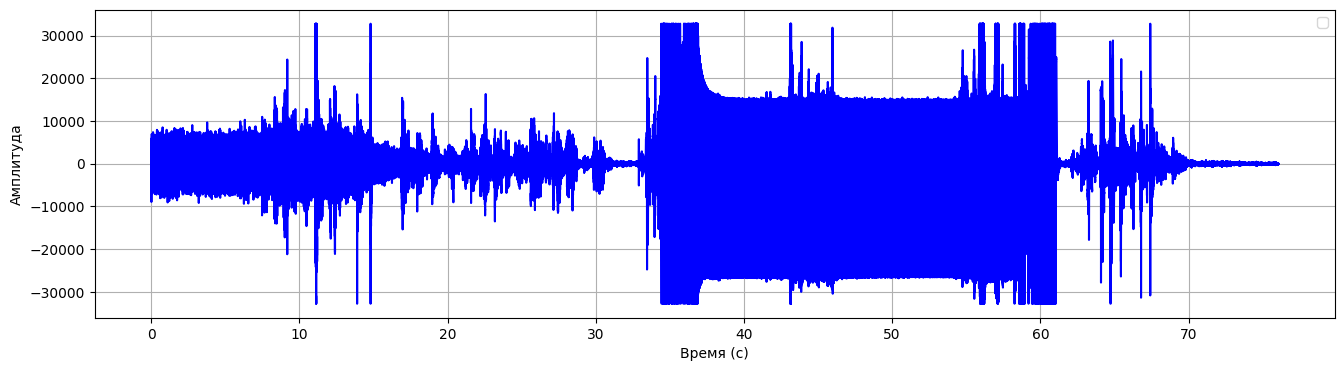

In [107]:
t_micr_calibr = np.arange(len(data_2209_micr_calibr))/fs
f_micr_calibr = fftfreq(len(data_2209_micr_calibr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr_calibr, data_2209_micr_calibr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [108]:
t_index = (t_micr_calibr > 48) & (t_micr_calibr < 53)
t_1000Hz = t_micr_calibr[t_index]

data_2209_micr_calibr_1000Hz = data_2209_micr_calibr[t_index]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


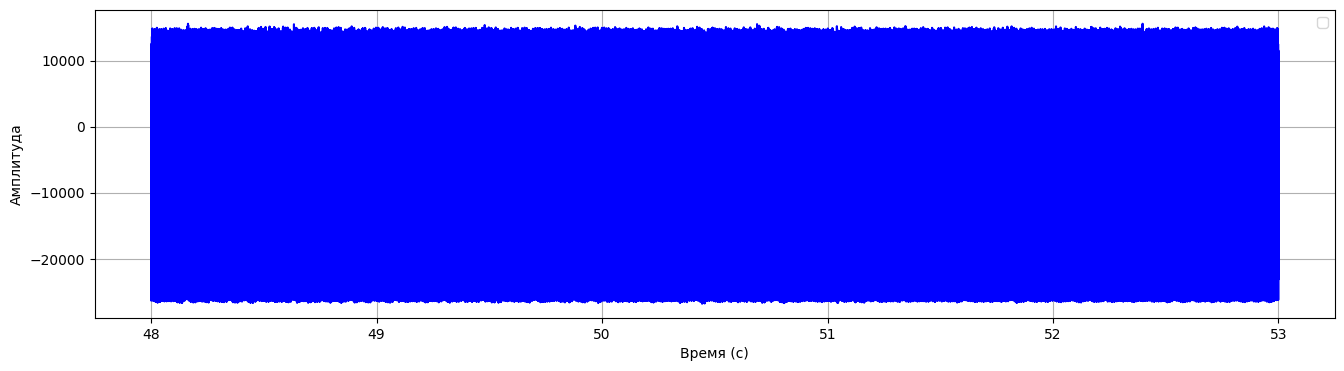

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(t_1000Hz, data_2209_micr_calibr_1000Hz, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [131]:
data_2209_micr_calibr_1000Hz_filt = ifft(filt_freq(fft(data_2209_micr_calibr_1000Hz), -11200, 23120, fs))
RMS_micr_1000Hz_calibr = RMS(data_2209_micr_calibr_1000Hz_filt)

In [132]:
data_2209_micr_calibr_1000Hz_filt_pa = data_2209_micr_calibr_1000Hz_filt / RMS_micr_1000Hz_calibr
rms_data_2209_micr_calibr_1000Hz_filt_pa = RMS(data_2209_micr_calibr_1000Hz_filt_pa)
dB_level = 20 * np.log10(rms_data_2209_micr_calibr_1000Hz_filt_pa / 20e-6)
print(dB_level)

93.97940008672037


In [133]:
data_1_filt = ifft(filt_freq(fft(data_2209_micr), 895, 1120, fs))
RMS_microphone_1000Hz = RMS(data_1_filt)

In [134]:
data_2209_micr_pa = data_2209_micr / RMS_micr_1000Hz_calibr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


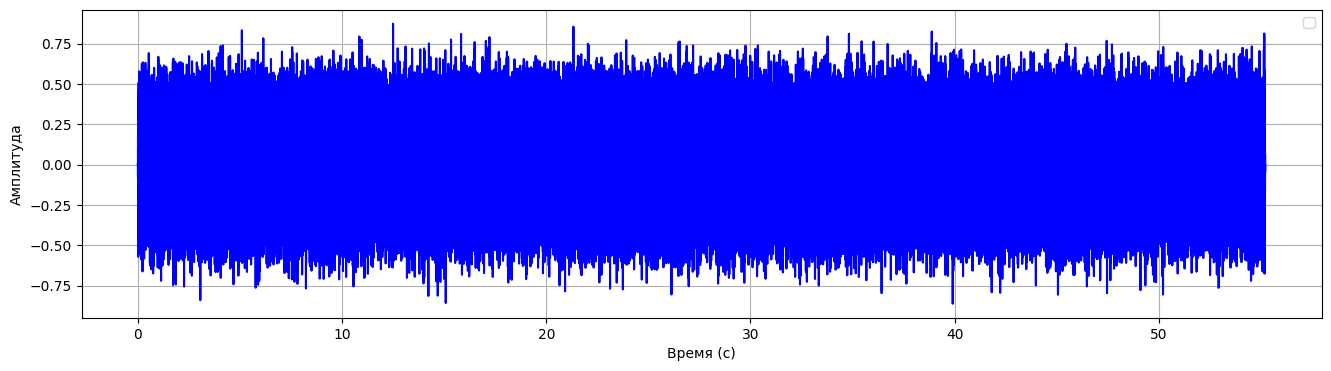

In [135]:
plt.figure(figsize=(16,4))
plt.plot(t_micr, data_2209_micr_pa, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [136]:
data_2209_micr_pa_rms = RMS(data_2209_micr_pa)
dB_level = 20 * np.log10(data_2209_micr_pa_rms / 20e-6)

In [137]:
dB_level

79.18230947547819

In [ ]:
amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_1_filt = ifft(filt_freq(fft(data_2209_micr), f1, f2, fs))
    amp = RMS(data_1_filt)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_2_filt = ifft(filt_freq(fft(data_2209_pgd), f1, f2, fs))
    amp = RMS(data_2_filt)
    amplitudes_PGD.append(amp)


amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)

l_39 = amplitudes_microphone / amplitudes_PGD